In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.9 MB/s eta 0:00:00


In [5]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [8]:
data=pd.read_csv("/kaggle/input/cleaned-cars/cleaned_cars.csv")

In [9]:
data

,id,region,price,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,description,state,lat,long,actual_model,act_manufacturer,age,usage
0,7316814884,auburn,33590,good,8 cylinders,gas,57923.0,clean,other,4wd,pickup,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,Sierra 1500 AWD,GMC,7.0,8274.714286
1,7316814758,auburn,22590,good,8 cylinders,gas,71229.0,clean,other,4wd,pickup,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,Silverado 1500 AWD,Chevrolet,11.0,6475.363636
2,7316814989,auburn,39590,good,8 cylinders,gas,19160.0,clean,other,4wd,pickup,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,Silverado 1500 AWD,Chevrolet,1.0,19160.000000
3,7316743432,auburn,30990,good,8 cylinders,gas,41124.0,clean,other,rwd,pickup,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,Tundra 2WD,Toyota,4.0,10281.000000
4,7316356412,auburn,15000,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592000,-85.518900,F250,Ford,8.0,16000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341300,7301591192,wyoming,23590,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,Maxima,Nissan,2.0,16113.000000
341301,7301591187,wyoming,30590,good,4 cylinders,gas,12029.0,clean,other,fwd,sedan,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,S60 B5,Volvo,1.0,12029.000000
341302,7301591147,wyoming,34990,good,4 cylinders,diesel,4174.0,clean,other,4wd,hatchback,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,XT4 AWD,Cadillac,1.0,4174.000000
341303,7301591140,wyoming,28990,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,ES 350,Lexus,3.0,10037.333333


In [19]:
!pip install alive-progress

  Obtaining dependency information for alive-progress from https://files.pythonhosted.org/packages/d5/81/91e164705bdf4e2774cea59f566a41ab25f3c87affd716516fc8b03a4039/alive_progress-3.1.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.3 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210079 sha256=8e8db895e65320fbb6638b17e805186d925027ed8947f684d8b0162d0303fd73
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [30]:
from alive_progress import alive_bar
import time
analyzer = SentimentIntensityAnalyzer()
i=-1
pd.options.mode.chained_assignment = None  # default='warn'
data.drop(["neu","neg","pos","compound"],axis=1)
data["neg"]=pd.Series()
data['neu']=pd.Series()
data['pos']=pd.Series()
data['compound']=pd.Series()
with alive_bar(len(data["description"]), force_tty=True) as bar:
    for sentence in data["description"]:
        i=i+1
        score = analyzer.polarity_scores(sentence)
        data["neg"][i]=score["neg"]
        data["neu"][i]=score["neu"]
        data["pos"][i]=score["pos"]
        data["compound"][i]=score["compound"]
        bar()

|████████████████████████████████████████| 341305/341305 [100%] in 2:04:12.7 (45


In [33]:
data.to_csv("cleaned_cars_with_sentiment.csv",index=False)

In [34]:
data2=data

In [35]:
data2

,id,region,price,condition,cylinders,fuel,odometer,title_status,transmission,drive,...,lat,long,actual_model,act_manufacturer,age,usage,neg,neu,pos,compound
0,7316814884,auburn,33590,good,8 cylinders,gas,57923.0,clean,other,4wd,...,32.590000,-85.480000,Sierra 1500 AWD,GMC,7.0,8274.714286,0.027,0.883,0.09,0.9888
1,7316814758,auburn,22590,good,8 cylinders,gas,71229.0,clean,other,4wd,...,32.590000,-85.480000,Silverado 1500 AWD,Chevrolet,11.0,6475.363636,0.027,0.885,0.088,0.9888
2,7316814989,auburn,39590,good,8 cylinders,gas,19160.0,clean,other,4wd,...,32.590000,-85.480000,Silverado 1500 AWD,Chevrolet,1.0,19160.000000,0.027,0.885,0.089,0.9888
3,7316743432,auburn,30990,good,8 cylinders,gas,41124.0,clean,other,rwd,...,32.590000,-85.480000,Tundra 2WD,Toyota,4.0,10281.000000,0.035,0.879,0.086,0.9842
4,7316356412,auburn,15000,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,...,32.592000,-85.518900,F250,Ford,8.0,16000.000000,0.0,0.791,0.209,0.4404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341300,7301591192,wyoming,23590,good,6 cylinders,gas,32226.0,clean,other,fwd,...,33.786500,-84.445400,Maxima,Nissan,2.0,16113.000000,0.028,0.877,0.094,0.9888
341301,7301591187,wyoming,30590,good,4 cylinders,gas,12029.0,clean,other,fwd,...,33.786500,-84.445400,S60 B5,Volvo,1.0,12029.000000,0.027,0.882,0.091,0.9888
341302,7301591147,wyoming,34990,good,4 cylinders,diesel,4174.0,clean,other,4wd,...,33.779214,-84.411811,XT4 AWD,Cadillac,1.0,4174.000000,0.03,0.872,0.098,0.9888
341303,7301591140,wyoming,28990,good,6 cylinders,gas,30112.0,clean,other,fwd,...,33.786500,-84.445400,ES 350,Lexus,3.0,10037.333333,0.027,0.884,0.089,0.9888


In [36]:
data3=pd.read_csv("/kaggle/input/cleaned-cars-sentiment/cleaned_cars_with_sentiment.csv")

array([[<Axes: title={'center': 'pos'}>, <Axes: title={'center': 'neu'}>],
       [<Axes: title={'center': 'neg'}>,
        <Axes: title={'center': 'compound'}>]], dtype=object)

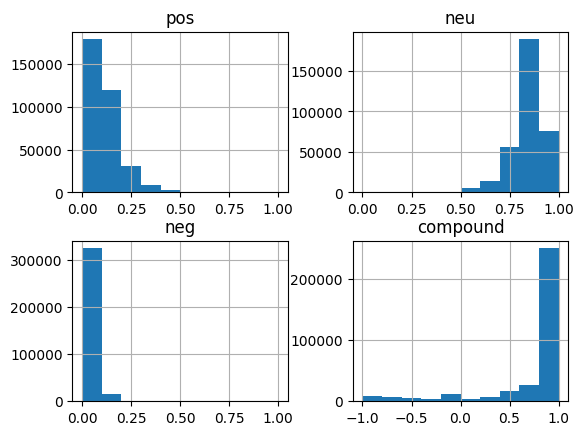

In [37]:
data3[["pos","neu","neg","compound"]].hist()

In [38]:
data3[["pos","neu","neg","compound"]].corr()

,pos,neu,neg,compound
pos,1.000000,-0.922420,0.021528,0.346431
neu,-0.922420,1.000000,-0.404902,-0.190460
neg,0.021528,-0.404902,1.000000,-0.327374
compound,0.346431,-0.190460,-0.327374,1.000000
